In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:

def KC_LZ(string):
    n = len(string)
    s = '0'+string
    c = 1
    l = 1
    i = 0
    k = 1
    k_max = 1

    while True:
        if s[i+k] != s[l+k]:
            if k > k_max:
                k_max = k
            i += 1
            if i == l:
                c += 1
                l += k_max
                if l+1 > n:
                    break
                else:
                    i = 0
                    k = 1
                    k_max = 1
            else:
                k = 1
        else:
            k += 1
            if l+k > n:
                c += 1
                break
    # a la Lempel and Ziv (IEEE trans inf theory it-22, 75 (1976),
    # h(n)=c(n)/b(n) where c(n) is the kolmogorov complexity
    # and h(n) is a normalised measure of complexity.
    complexity = c
    # b=n*1.0/np.log2(n)
    # complexity=c/b;
    return complexity


In [56]:
def calc_KC(s):
    L = len(s)
    if s == '0'*L or s == '1'*L:
        return np.log2(L)
    else:
        return np.log2(L)*(KC_LZ(s)+KC_LZ(s[::-1]))/2.0

In [57]:
iterations = 25

def f(x,r):
    return r * x * (1-x)

def logistic_map(x_0,r,iterations):
    res = [x_0]
    cur = x_0
    for i in range(iterations-1):
        cur = f(cur,r)
        res.append(cur)
    return res

def discretize(arr):
    return list(map(round,arr))

def to_bin(arr):
    return ''.join(list(map(str,arr)))

In [58]:
samples = 10**6
points = []
for _ in range(samples):
    points.append(to_bin(discretize(logistic_map(np.random.rand(),np.random.uniform(4),iterations))) )

In [59]:

from collections import Counter
counts = Counter(points)

probability = counts.copy()
for key in probability:
    probability[key] /= samples


In [60]:

probability_values =  list(probability.values())
complexities = list(map(calc_KC,probability.keys()))

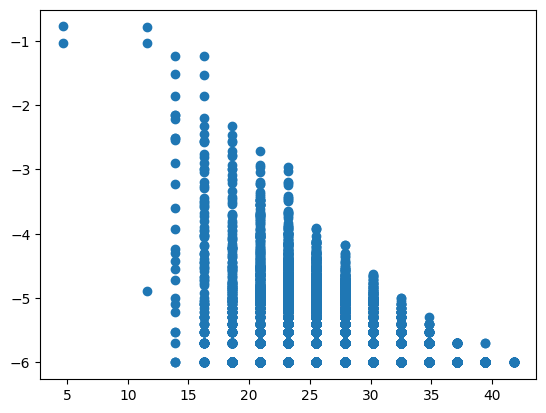

In [61]:
plt.scatter(complexities,np.log10(probability_values))